In [1]:
import cv2
import numpy as np
import helpers
import sudoku

def showImage(img,title='Resized Window'):

    #define the screen resulation
    screen_res = 1280, 720
    scale_width = screen_res[0] / img.shape[1]
    scale_height = screen_res[1] / img.shape[0]
    scale = min(scale_width, scale_height)

    #resized window width and height
    window_width = int(img.shape[1] * scale)
    window_height = int(img.shape[0] * scale)

    #cv2.WINDOW_NORMAL makes the output window resizealbe
    cv2.namedWindow(title, cv2.WINDOW_NORMAL)

    #resize the window according to the screen resolution
    cv2.resizeWindow(title, window_width, window_height)

    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
image = cv2.imread('puzz1.jpg',0)
outerBox = np.ndarray(image.shape)

In [3]:
image2 = sudoku.InputImage('test input', 'puzz1.jpg')
board2 = image2.getBoard()
board2.show()

In [4]:
board2.boxes[79].show()

<a href='https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/'>Gaussian Blur</a>

In [5]:
image = cv2.GaussianBlur(image,(11,11),0)

<a href="https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/">Adaptive Thresholding</a>

In [6]:
outerBox = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)

In [7]:
cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2)
cv2.bitwise_not(outerBox)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
outerBox = cv2.bitwise_not(outerBox)

<a href='https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html'>Dilation</a>

In [9]:
outerBox = cv2.dilate(outerBox, cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)),iterations=4)

In [10]:
contours, heirarchy = cv2.findContours(outerBox, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0).fit(contours[0][:,0,:])

In [12]:
grid_corners = kmeans.cluster_centers_
image_corners_dict = {'topLeft':(0,0), 'topRight':(image.shape[1],0), 'bottomLeft':(0,image.shape[0]), 'bottomRight':(image.shape[1],image.shape[0])}
grid_corners_dict = {r: grid_corners[np.argmin([np.linalg.norm(i-np.array(k)) for i in grid_corners])] for (r,k) in image_corners_dict.items()}

In [13]:
list(image_corners_dict.values())

[(0, 0), (1125, 0), (0, 1167), (1125, 1167)]

In [14]:
x = int(min(image.shape[0],image.shape[1]) * 0.90)

pts1 = np.float32(list(grid_corners_dict.values()))
pts2 = np.float32([(0,0),(x,0),(0,x),(x,x)])
pts3 = np.float32(list(image_corners_dict.values())) * 0.90
#list(image_corners_dict.values())

In [15]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)
newImage = cv2.warpPerspective(outerBox, matrix, image.shape)

In [16]:
showImage(newImage)

In [17]:
newImage = newImage[0:x,0:x]

In [18]:
boxes = board2.boxes.copy()

In [19]:
import os

from tensorflow import keras

#print(tf.version.VERSION)

In [20]:

new_model = sudoku.DigitRecognizer('digit_recognizer')
x = boxes[0].cv_image
showImage(new_model.preprocess(x))

In [47]:
model = keras.models.load_model('digit_recognizer')

In [51]:

test = boxes[76].cv_image
test = new_model.preprocess(test)
test = cv2.resize(test,(32,32),interpolation=cv2.INTER_AREA)
ret,test = cv2.threshold(test,240,255,cv2.THRESH_BINARY_INV)
showImage(test)
test = test.reshape((-1,32,32,1))

results = model.predict(test)
print(results)
print(np.argmax(results,axis = 1),int(np.max(results)))


[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 2.297281e-37
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 7.070188e-37]]
[3] 1


In [40]:
test = boxes[4]
test = cv2.resize(test,(32,32),interpolation=cv2.INTER_AREA)

showImage(test)
test = test.reshape((-1,32,32,1))
results = new_model.model.predict(test)
print(results)
print(np.argmax(results,axis = 1),int(np.max(results)))

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
test= cv2.dilate(test, cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)),iterations=3)
test = cv2.bilateralFilter(test,4,75,75)
test = cv2.resize(test,(32,32),interpolation=cv2.INTER_AREA)
test = cv2.bitwise_not(test)

In [84]:
for test in boxes:
    test = cv2.resize(test,(32,32),interpolation=cv2.INTER_AREA)
    test = test.reshape((-1,32,32,1))
    results = new_model.predict(test)
    print(np.argmax(results,axis = 1),np.max(results))


[9] 1.0
[2] 1.0
[2] 0.79571104
[2] 0.7891244
[3] 0.9918208
[2] 0.94732153
[3] 1.0
[2] 0.9995128
[2] 0.9989851
[8] 1.0
[5] 1.0
[8] 0.89203185
[8] 0.73443794
[9] 1.0
[8] 0.9383874
[8] 0.97968984
[2] 1.0
[8] 0.9502507
[6] 0.99999535
[8] 0.7601064
[3] 1.0
[8] 0.9967078
[8] 0.9999789
[8] 0.9999317
[8] 0.99991786
[8] 0.99926275
[8] 0.999741
[6] 0.99999964
[6] 0.98486876
[8] 0.9728976
[6] 0.58393675
[8] 0.9990087
[2] 1.0
[8] 0.9996209
[8] 0.9973156
[8] 0.99878615
[3] 1.0
[8] 0.9683564
[8] 0.99994993
[8] 0.99858284
[8] 0.9999862
[8] 0.96292126
[6] 1.0
[8] 0.9997408
[8] 0.99993813
[2] 1.0
[9] 1.0
[2] 1.0
[8] 0.999997
[8] 0.9999999
[8] 0.99999607
[2] 1.0
[5] 1.0
[8] 0.9991406
[6] 0.9174445
[8] 0.9999579
[8] 0.9999999
[5] 1.0
[8] 1.0
[9] 1.0
[8] 0.99999964
[6] 0.9998722
[2] 1.0
[8] 0.9810554
[8] 1.0
[5] 1.0
[8] 0.9999999
[2] 1.0
[8] 1.0
[4] 1.0
[8] 0.9999995
[8] 0.99999714
[8] 0.9999939
[8] 1.0
[9] 0.99999166
[2] 1.0
[4] 1.0
[8] 1.0
[8] 1.0
[3] 1.0
[8] 0.9999987


In [26]:
test = test.reshape((-1,32,32,1))
results = new_model.predict(test)
results = np.argmax(results,axis = 1)
#np.max(results)

In [47]:
showImage(outerBox[50:850,50:850])

In [48]:
showImage(image)

In [28]:
results

array([8])

In [49]:

cirle = image.copy()
# Radius of circle
radius = 2
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
for c  in np.int32(list(grid_corners)):
    circle = cv2.circle(image,c, radius, color, thickness)

In [18]:
showImage(circle)

NameError: name 'showImage' is not defined

In [2]:
#need to make and test out new model
#prep data
'''
Use this to import data https://www.tensorflow.org/guide/data#consuming_sets_of_files
Use this to apply your preprossing steps https://www.tensorflow.org/guide/data#applying_arbitrary_python_logic
Use this to see how to use it with a model https://www.tensorflow.org/guide/data#applying_arbitrary_python_logic
'''


'\nUse this to import data https://www.tensorflow.org/guide/data#consuming_sets_of_files\nUse this to apply your preprossing steps https://www.tensorflow.org/guide/data#applying_arbitrary_python_logic\nUse this to see how to use it with a model https://www.tensorflow.org/guide/data#applying_arbitrary_python_logic\n'

In [3]:
import tensorflow as tf
import tensorflow.data as tfd

list_ds = tfd.Dataset.list_files(str('Dataset/training_data/*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'Dataset/training_data/3/62587.png'
b'Dataset/training_data/6/61726.png'
b'Dataset/training_data/7/64247.png'
b'Dataset/training_data/0/57724.png'
b'Dataset/training_data/8/61116.png'


In [4]:
def process_path(file_path):
  label = tf.strings.split(file_path, os.sep)[-2]
  return tf.io.read_file(file_path), label

labeled_ds = list_ds.map(process_path)

In [5]:
for image_raw, label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00#\x00\x00\x00*\x08\x00\x00\x00\x00\x1c\xbd\xbdM\x00\x00\x04>IDATx\x9c\x05\xc1Ys\x1b\xc7\x11\x00\xe0\xbefv\x17'I\xf0\x92(R\x87\xc5\xc4\xb2S\xe5\x97\xfc\xff\xaa\xbc\xe7).\xc7\x92bK&$\x9e\x00H\\\xc4\x1e3\xdd\x9d\xef\xc3\x7f\x99\x92;*\x88\x19"

b'3'


In [6]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.io.decode_png(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

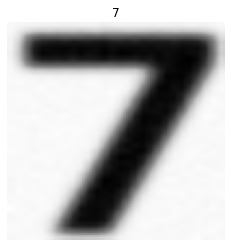

In [7]:
import matplotlib.pyplot as plt

file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image, label):
  plt.figure()
  plt.imshow(image, cmap='Greys_r')
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')

show(image, label)


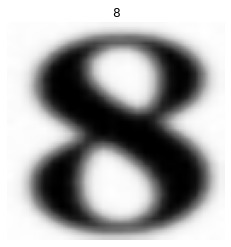

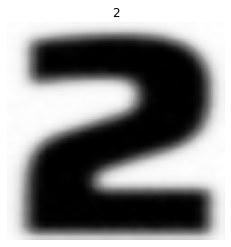

In [8]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
  show(image, label)

In [96]:
type(label)

tensorflow.python.framework.ops.EagerTensor

In [9]:
#next I should apply my own functions to preprocess
image.shape

TensorShape([128, 128, 1])

In [10]:
import cv2 as cv

showImage(image.numpy())

In [71]:
image2 = image.numpy()
image2.shape

(128, 128, 1)

In [72]:
image2 = image2.reshape((128,128))

In [17]:
showImage(image2)

In [24]:
image3 = cv.imread('hough.jpg', 0 )

In [73]:
print(np.max(image3))
img4 = (image2*255).astype(np.uint8)



239


In [45]:
np.max(image)

0.84905034

In [74]:
ret, wow = cv.threshold(img4,30,255, cv.THRESH_BINARY)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'threshold'
> Overload resolution failed:
>  - src data type = 23 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


In [70]:
out_wow = wow/255
np.max(out_wow)

#show('22',out_wow)


1.0

In [78]:

'''
This takes in the image ndarray with values between
0 and 1 and returns a thresholded image
'''
def threshold(image):
    image = (image*255).astype(np.uint8)
    ret, image = cv.threshold(image,30,255, cv.THRESH_BINARY)
    image = image/255
    return image
    
    

In [79]:
img5 = threshold(image.numpy())

In [99]:
@tf.function
def tf_threshold(image,label):
    im_shape = image.shape
    [image,] = tf.py_function(func=threshold, inp = [image], Tout = [tf.float32])
    image.set_shape(im_shape)
    return tf.constant(image), tf.constant(label)

In [100]:
images2_ds = images_ds.map(tf_threshold)

for image, label in images2_ds.take(2):
  show(image, label)

TypeError: in user code:

    File "<ipython-input-99-aee879c8d07c>", line 6, in tf_threshold  *
        return tf.constant(image), tf.constant(label)

    TypeError: Expected any non-tensor type, but got a tensor instead.
